Dataset is downloaded from Kaggle. Link: https://www.kaggle.com/giripujar/hr-analytics

Exercise

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

1.Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)

2.Plot bar charts showing impact of employee salaries on retention

3.Plot bar charts showing corelation between department and employee retention

4.Now build logistic regression model using variables that were narrowed down in step 1

Measure the accuracy of the model

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<h2 style="color:purple">Data exploration and visualization</h2>

In [3]:
left = df[df.left==1]
left.shape

(3571, 10)

In [4]:
retained = df[df.left==0]
retained.shape

(11428, 10)

**Average numbers for all columns** 

In [5]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,
<ol>
    <li>**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)</li>
    <li>**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)</li>
    <li>**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm </li>
</ol>

**Impact of salary on employee retention**

Text(0, 0.5, 'left')

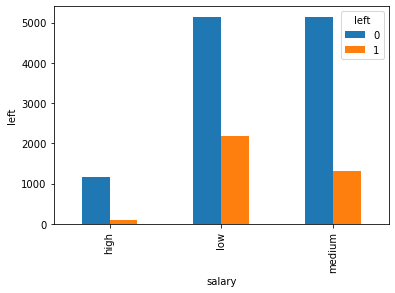

In [6]:
pd.crosstab(df.salary,df.left).plot(kind='bar') # 0 means retained and 1 means left
plt.ylabel('left')

Above bar chart shows employees with high salaries are likely to not leave the company

**Department wise employee retention rate**

Text(0, 0.5, 'left')

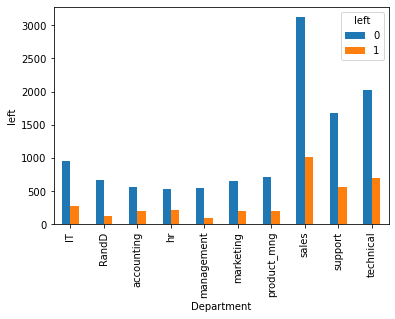

In [7]:
pd.crosstab(df.Department,df.left).plot(kind='bar')
plt.xlabel('Department')
plt.ylabel('left')

From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

<h3 style="color:purple">From the data analysis so far we can conclude that we will use following variables as independant variables in our model</h3>
<ol>
    <li>**Satisfaction Level**</li>
    <li>**Average Monthly Hours**</li>
    <li>**Promotion Last 5 Years**</li>
    <li>**Salary**</li>
</ol>

In [8]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


**Tackle salary dummy variable**

Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that. Check my one hot encoding tutorial to understand purpose behind dummy variables.

In [11]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")
salary_dummies.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [12]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [13]:
df_with_dummies.head(10209)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
10204,0.57,263,0,medium,0,0,1
10205,0.56,208,0,medium,0,0,1
10206,0.64,143,0,high,1,0,0
10207,0.53,236,0,high,1,0,0


Now we need to remove salary column which is text data. It is already replaced by dummy variables so we can safely remove it

In [14]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [15]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [16]:
y = df.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [18]:
len(X)

14999

In [19]:
len(X_train)

10499

In [21]:
X_train

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
7059,0.56,216,0,1,0,0
5584,0.23,234,0,0,0,1
6491,0.81,204,0,1,0,0
13497,0.76,170,0,0,0,1
7856,0.80,266,0,0,1,0
...,...,...,...,...,...,...
6840,0.85,188,0,0,1,0
9178,0.49,185,0,0,1,0
9792,0.76,254,0,0,1,0
5787,0.16,140,0,0,0,1


In [20]:
len(X_test)

4500

In [22]:
X_test

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
12636,0.44,140,0,0,1,0
1097,0.38,134,0,0,1,0
13959,0.99,209,0,0,0,1
8896,0.50,229,0,0,1,0
1844,0.37,154,0,0,1,0
...,...,...,...,...,...,...
735,0.83,258,0,1,0,0
8098,0.98,204,0,0,1,0
4818,0.50,184,0,0,0,1
2023,1.00,174,0,0,1,0


In [24]:
len(y)

14999

In [25]:
len(y_train)

4499

In [27]:
y_train

5757     0
10768    0
200      1
13559    0
9880     0
        ..
9332     0
5152     0
8291     0
6869     0
4287     0
Name: left, Length: 4499, dtype: int64

In [26]:
len(y_test)

10500

In [28]:
y_test

14399    1
6517     0
2995     0
605      1
14439    1
        ..
8658     0
4326     0
8426     0
12940    0
6509     0
Name: left, Length: 10500, dtype: int64

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [30]:
model.fit(X_train, y_train)

LogisticRegression()

In [34]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
y_test.head()

14399    1
6517     0
2995     0
605      1
14439    1
Name: left, dtype: int64

In [37]:
model.score(X_test,y_test)

0.7762857142857142

In [38]:
model.predict([[0.37,159,0,0,1,0]])

c:\users\dell1\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [39]:
model.predict([[0.19,198,0,1,0,0]])

c:\users\dell1\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

# Another Method 


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [24]:
len(X)

14999

In [25]:
len(X_train)

4499

In [27]:
X_train

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
6451,0.72,213,0,1,0,0
9778,0.34,131,0,0,0,1
11090,0.87,140,0,0,0,1
8335,0.59,126,0,0,0,1
6127,0.76,144,0,1,0,0
...,...,...,...,...,...,...
13040,0.53,274,0,0,0,1
10455,0.52,170,0,0,1,0
10390,0.59,210,0,0,0,1
13734,0.45,156,0,1,0,0


In [26]:
len(X_test)

10500

In [28]:
X_test

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
13292,0.94,176,0,0,0,1
13748,0.60,260,0,0,0,1
2667,0.53,151,0,0,1,0
6956,0.79,168,0,1,0,0
7338,0.59,234,0,1,0,0
...,...,...,...,...,...,...
11357,0.80,272,0,0,1,0
8007,0.75,186,0,0,0,1
5341,0.81,133,0,0,1,0
3599,0.76,219,0,0,1,0


In [29]:
len(y_train)

4499

In [30]:
y_train

6451     0
9778     0
11090    0
8335     0
6127     0
        ..
13040    0
10455    0
10390    0
13734    0
4663     0
Name: left, Length: 4499, dtype: int64

In [31]:
len(y_test)

10500

In [32]:
y_test

13292    0
13748    0
2667     0
6956     0
7338     0
        ..
11357    0
8007     0
5341     0
3599     0
5946     0
Name: left, Length: 10500, dtype: int64

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [17]:
model.fit(X_train, y_train)

LogisticRegression()

In [33]:
X_test

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
13292,0.94,176,0,0,0,1
13748,0.60,260,0,0,0,1
2667,0.53,151,0,0,1,0
6956,0.79,168,0,1,0,0
7338,0.59,234,0,1,0,0
...,...,...,...,...,...,...
11357,0.80,272,0,0,1,0
8007,0.75,186,0,0,0,1
5341,0.81,133,0,0,1,0
3599,0.76,219,0,0,1,0


In [18]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
y_test

13292    0
13748    0
2667     0
6956     0
7338     0
        ..
11357    0
8007     0
5341     0
3599     0
5946     0
Name: left, Length: 10500, dtype: int64

In [19]:
model.predict([[0.37,159,0,0,1,0]])

c:\users\dell1\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [20]:
model.predict([[0.19,198,0,1,0,0]])

c:\users\dell1\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [21]:
model.predict([[0.36,126,0,1,0,0]])

c:\users\dell1\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [22]:
model.predict([[0.97,193,0,0,0,1]])

c:\users\dell1\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

**Accuracy of the model**

In [23]:
model.score(X_test,y_test)

0.7763809523809524